- ENVISIONING THE ANSWER:
- Asking Question 
- Search for info 
- structure data 
- Envision the answer
- Represent the visualizaion
- Tell The story


- Introduction 
- Motivation  

- Question 
- Data Set Description 

- Data Processing ####
- Visualization/Description
- Quantitative Analysis (numbers)
- Qualitative Analysis (characters)

- Analysis

- Conclusion

# <span style="color:#ff4238;">__CP321 FINAL Project__</span>

#### Authors: Lucas Duncan, Owen Macgowan

#### Date: April 2024

![Friends](https://qph.cf2.quoracdn.net/main-qimg-55f2935b1d162eb07783e02013ca66e9-lq)

---
## <span style="color:#42a2d6;">__Summary of Contents__</span>
#### __Our Final project will build on our midterm and cover the following topics:__
1. Introduction + Motivation
2. Research Question
3. Data Set Description + Importing
4. Data Processing
5. Analysis + Visualizations
6. Conclusions

# <span style="color:#f6be00;">__1. Introduction + Motivation__</span>

# <span style="color:#06bef0;">__2. Research Question__</span>

### How do trends in speech, specically exclamatory speech, and dialogue length effect episode rating in the series friends.


# <span style="color:#f6beff;">__3. Data Set Importing + Description__</span>

#### The 2 datasets we will use for this project are 2 datasets about the FRIENDS tv show, both from the "rfordatascience" github account (source approved via email)

### Dialogue:  (Data Set 1/2)

#### A dataset representing each contigious line of dialogue within the show, it marks the exact dialogue used "text", the name of the character who said it, "speaker", the "season" and "episode" it occurs in, as well as the numbered "scene" within its episode it belongs to, and its index in that scene "utterance"

#### NOTE: This dataset also contains rows about scene directions, and background events and noises, which are irrelevant for our purposes, and thus we remove them almost immediatly (see below).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dialogue = pd.read_csv(("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-08/friends.csv"))
dialogue.sample(2)

,text,speaker,season,episode,scene,utterance
1350,Wait here. Breathe.,Phoebe Buffay,1,5,14,14
31949,"All right, I gotta take off. I'm picking up Be...",Ross Geller,5,18,2,23


### Episode Info: (Dataset 2/2)

#### A dataset representing episode level information/statistics for every "season" and "episode". Within each row ("episode"), its episode "title", director name ("directed_by"), and writter ("written_by") are given, as well as its "air_date", the viewing numbers of that airing ("us_views_million"), and its rating by IMDB ("imdb_rating")

In [5]:
episodes = pd.read_csv(("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-08/friends_info.csv"))
episodes.sample(2)

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
62,3,15,The One Where Ross and Rachel Take a Break,James Burrows,Michael Borkow,1997-02-13,27.30,8.6
231,10,14,The One with Princess Consuela,Gary Halvorson,Story by : Robert CarlockTeleplay by : Tracy R...,2004-02-26,22.83,8.6


# <span style="color:#00be00;">__4. Data Processing__</span>

In [14]:
#Filters Out Non Dialogue Rows
all_dialogue = dialogue[~dialogue["speaker"].isin(["Scene Directions", "#ALL#", "NA"])]

#Defines a function that returns the number of items in text, that contain exclamation
def exclam_size(text):
    return (text.str.contains(r'[A-Z]{2,}') | text.str.contains(r'!')).sum()

In [24]:

dialogue_stats_by_episode = all_dialogue.groupby(["season", "episode"]).agg(
                            total_dialogue = ("text", "size"),
                            total_exclamatory_dialogue = ("text", exclam_size)
                      ).reset_index()

dialogue_stats_by_episode.head(2)

,season,episode,total_dialogue,total_exclamatory_dialogue
0,1,1,292,72
1,1,2,241,54


In [23]:
joined_table = pd.merge(dialogue_stats_by_episode, episodes, on=["season", "episode"]).drop(columns=["title", "directed_by", 
                                                                                                     "written_by", "air_date", "us_views_millions"])
joined_table.head(3)

,season,episode,total_dialogue,total_exclamatory_dialogue,imdb_rating
0,1,1,292,72,8.3
1,1,2,241,54,8.1
2,1,3,237,51,8.2


# <span style="color:#ff0000;">__5. Analysis + Visualizations__</span>

# <span style="color:#06fee0;">__6. Conclusions__</span>

DATA SET: (data set description, search for info, structuring????????)

DATA PRE PROCESSING:

RESULTING VISUALIZATIONS:

In [101]:




#Removes Non Dialogue:
verbal_dialogue = dialogue[~dialogue["speaker"].isin(["Scene Directions", "#ALL#", "NA"])]

#Main Character Names
main_character_names = ["Ross Geller", "Monica Geller",
                        "Phoebe Buffay", "Chandler Bing",
                        "Joey Tribbiani", "Rachel Green"]


#Functions For Later
def total_words(x):
    return x.str.len().sum()

def total_lines(x):
    return len(x)

def total_lines_of_exclamation(x):
    
    return len(x[x.str.contains(r'[A-Z]{2,}') | x.str.contains(r'!')])


#TOTAL WORDS / LINES BY SCENE
total_lines_words_by_scene = verbal_dialogue.groupby(["season", "episode", "scene"])["text"].agg([total_words, total_lines])
total_lines_words_per_episode = total_lines_words_by_scene.rename(columns={"total_words":"scene_total_words", "total_lines": "scene_total_lines"})


#Stats on Unique Main Character Dialogue
main_character_dialogue = verbal_dialogue[verbal_dialogue["speaker"].isin(main_character_names)]
main_character_stats = main_character_dialogue.groupby(["season", "episode", "scene", "speaker"])["text"].agg([total_words, total_lines, total_lines_of_exclamation]).reset_index()

#Stats on Aggregate Other Character Dialogue
other_character_dialogue = verbal_dialogue[~verbal_dialogue["speaker"].isin(main_character_names)]
other_character_stats = other_character_dialogue.groupby(["season", "episode", "scene"])["text"].agg([total_words, total_lines, total_lines_of_exclamation]).reset_index()
other_character_stats.insert(2, "speaker", "Other")


#Join stats of main_character and other_characters
all_absolute_stats = pd.concat([main_character_stats, other_character_stats])

#Join Character stats with episode overall
joined_stats = pd.merge(all_absolute_stats, total_lines_words_per_episode,how = 'right', on=["episode", "season"])

#Merge With Overall Episode info
by_scene_character = pd.merge(joined_stats, episodes, how='right', on=["episode", "season"]).sort_values(by=["season", "episode", "scene", "speaker"])

joined_stats.sample(4)








,season,episode,scene,speaker,total_words,total_lines,total_lines_of_exclamation,scene_total_words,scene_total_lines,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
111081,8,8,2,Other,891,14,5,1192,26,The One with the Stripper,David Schwimmer,Andrew Reich & Ted Cohen,2001-11-15,26.54,8.8
37731,3,13,2,Monica Geller,196,5,0,162,9,The One Where Monica and Richard Are Just Friends,Robby Benson,Michael Borkow,1997-01-30,28.00,8.2
20821,2,9,2,Other,40,6,1,648,21,The One with Phoebe's Dad,Kevin S. Bright,Jeffrey Astrof & Mike Sikowitz,1995-12-14,27.80,8.0
117589,8,23,9,Joey Tribbiani,105,5,2,552,14,The One Where Rachel Has a Baby,Kevin S. Bright,Scott SilveriMarta Kauffman & David Crane,2002-05-16,34.91,8.8


In [ ]:
#INSIGHT INTO SHOW OVERALL
fig, axs = plt.subplots(5, figsize=(10, 15))


#IVE ADDED SOME EXAMPLE BELOW

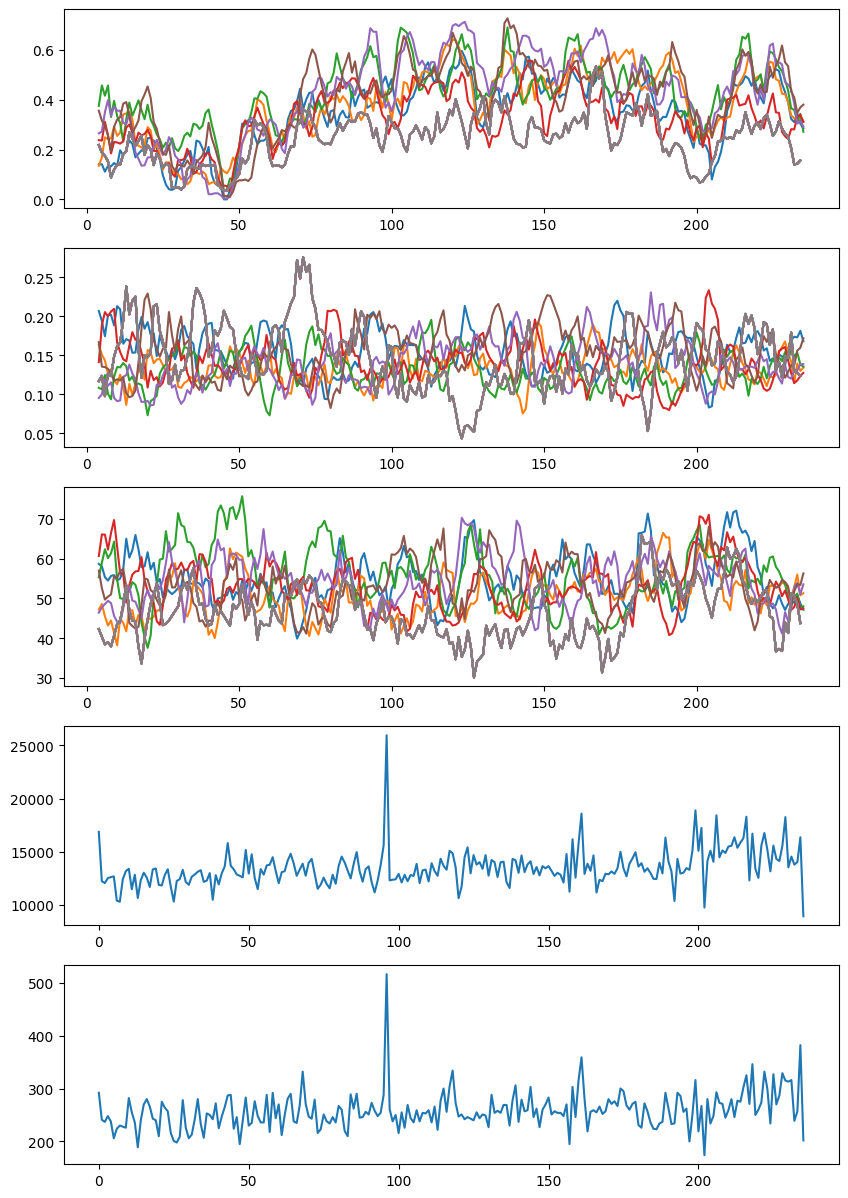

In [91]:
main_character_names.append("Other")
fig, axs = plt.subplots(5, figsize=(10, 15))

axs[3].plot(range(0, len(total_lines_words_per_episode)), total_lines_words_per_episode["episode_total_words"])
axs[4].plot(range(0, len(total_lines_words_per_episode)), total_lines_words_per_episode["episode_total_lines"])

# RATIO OF EXCLAMATORY WORDS PER EPISODE
for name in main_character_names:

    rows_to_consider = joined_stats[joined_stats["speaker"] == name]


    #ADDS Ratio Of Exclamatory Statements
    ratio_of_exclamation = rows_to_consider["total_words_of_exclamation"]/rows_to_consider["total_words"]
    rolling_avg = ratio_of_exclamation.rolling(window=5).mean()
    axs[0].plot(range(0, len(rows_to_consider)), rolling_avg, label=f"{name} Rolling Avg")


    #ADDS Ratio Of Total Words Statements
    ratio_of_exclamation = rows_to_consider["total_words"]/rows_to_consider["episode_total_words"]
    rolling_avg = ratio_of_exclamation.rolling(window=5).mean()
    axs[1].plot(range(0, len(rows_to_consider)), rolling_avg, label=f"{name} Rolling Avg")


    #ADDS Ratio Of Word/Statment
    ratio_of_exclamation = rows_to_consider["total_words"]/rows_to_consider["total_lines"]
    rolling_avg = ratio_of_exclamation.rolling(window=5).mean()
    axs[2].plot(range(0, len(rows_to_consider)), rolling_avg, label=f"{name} Rolling Avg")

